# Linear Regression - Wooldrige Beauty Dataset

Hi again! Before we start our project we need to load some libraries that will make our job **a lot** easier. In this project i choose a dataset that is easy to understand and transform, but you can use your own if you like. The imports are:

1. Statsmodels Linear regression, will help us to make and interpret the regression
2. Wooldrige to give us a dataset to work with (https://github.com/spring-haru/wooldridge)
3. Matplotlib to create graph visualizations

*Remember that you will need to install these libraries preferably using pip install, like this:

``` py -m pip install statsmodels, wooldridge``` -> in the console

In [1]:
from statsmodels.api import OLS, add_constant
import wooldridge
import matplotlib.pyplot as plt

#### Acquire the data: 

This is where we are going to get the data for this project. Jeffrey Wooldridge is a Professor of Economics at Michigan State University and is known for his contributions to the field of econometrics, particularly in the areas of panel data analysis and microeconometrics. Wooldridge has also developed several important econometric models and estimation techniques. One of his most well-known contributions is the linear fixed effects model for panel data analysis, which is now a standard tool in empirical microeconomics.

- As for datasets, Wooldridge has used a variety of datasets in his research. In this lesson, were going to use the Beauty dataset. Beauty was used to investigate the relationship between physical attractiveness and labor market outcomes.

The `data` method in the `wooldridge` package is used to load a specific dataset into memory. The "description=True" argument is used to print a description of the dataset to the console, providing information on the variables included in the dataset and how they were collected.

In [2]:
wooldridge.data('Beauty', description=True)

name of dataset: beauty
no of variables: 17
no of observations: 1260

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| wage     | hourly wage                   |
| lwage    | log(wage)                     |
| belavg   | =1 if looks <= 2              |
| abvavg   | =1 if looks >=4               |
| exper    | years of workforce experience |
| looks    | from 1 to 5                   |
| union    | =1 if union member            |
| goodhlth | =1 if good health             |
| black    | =1 if black                   |
| female   | =1 if female                  |
| married  | =1 if married                 |
| south    | =1 if live in south           |
| bigcity  | =1 if live in big city        |
| smllcity | =1 if live in small city      |
| service  | =1 if service industry        |
| expersq  | exper^2                       |
| educ     | years of schooling            |
+----------+------------------

In [3]:
df = wooldridge.data('Beauty')

df.head()

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ
0,5.73,1.745715,0,1,30,4,0,1,0,1,1,0,0,1,1,900,14
1,4.28,1.453953,0,0,28,3,0,1,0,1,1,1,0,1,0,784,12
2,7.96,2.074429,0,1,35,4,0,1,0,1,0,0,0,1,0,1225,10
3,11.57,2.448416,0,0,38,3,0,1,0,0,1,0,1,0,1,1444,16
4,11.42,2.435366,0,0,27,3,0,1,0,0,1,0,0,1,0,729,16


Now that we already have our data inside a pandas dataframe we can start our linear regression model! The model we are going to use is the Ordinary Least Squares Linear Regression a commonly used method in econometrics. The goal is to estimate the coefficients of a linear equation that describes the relationship between a dependent variable (Y) and one or more independent variables (X1, X2, ..., Xn).

The OLS model works by minimizing the sum of the squared residuals (SSR) between the predicted values of Y and the actual values of Y. This is done by estimating the coefficients of the linear equation in such a way that the SSR is as small as possible. It depicts how the variation in the dependent variable in a regression model cannot be explained by the model and can be expressed by:

$$SSR = ∑_{i=1}^{n} (y_i - ŷ_i)^2$$

The 

Mathematically, the OLS linear regression model can be represented as follows:

$$Y = β0 + β1X1 + β2X2 + ... + βnXn + u$$

where:
1. Y is the dependent variable, 
2. X1, X2, ..., Xn are the independent variables, 
3. β0 is the intercept or constant term, 
4. β1, β2, ..., βn are the coefficients or slopes, 
5. u is the error term or disturbance term.

The OLS method estimates the values of β0, β1, β2, ..., βn that minimize the sum of the squared errors. This is done by finding the values of the coefficients that make the partial derivative of the sum of the squared errors with respect to each coefficient equal to zero.

Once the coefficients have been estimated, they can be used to predict the value of Y for a given set of values of the independent variables. OLS linear regression is a widely used method in econometrics and is often used to estimate the causal effect of one or more independent variables on a dependent variable.


Wait up! Before we create our model we first need to define our dependent (y) and Independent(X) variables. Note that we are only going to use some of the variables avaible in the dataset. This can be done by accessing our Beauty Dataframe in the following manner:

In [4]:
y = df.lwage
X = df[['educ','exper','belavg', 'abvavg', 'female', 'union', 'black', 'married','bigcity','goodhlth']]

Its also important for us to add the intercept (β0) to our model to the X variables of our model.

In [5]:
X = add_constant(X)
X.head()

,const,educ,exper,belavg,abvavg,female,union,black,married,bigcity,goodhlth
0,1.0,14,30,0,1,1,0,0,1,0,1
1,1.0,12,28,0,0,1,0,0,1,0,1
2,1.0,10,35,0,1,1,0,0,0,0,1
3,1.0,16,38,0,0,0,0,0,1,1,1
4,1.0,16,27,0,0,0,0,0,1,0,1


Great! Now that we have our variables created we need to create the Linear Model itself. The way to do this is very simple, just instantiate the model object and then use the `.fit` method to train the model based on the created variables. Like This:

In [6]:
linear_model = OLS(y,X)
linear_model = linear_model.fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     76.04
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.48e-121
Time:                        10:31:30   Log-Likelihood:                -832.59
No. Observations:                1260   AIC:                             1687.
Df Residuals:                    1249   BIC:                             1744.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5485      0.094      5.805      0.000       0.363       0.734
educ           0.0674      0.005     12.618      0.000       0.057       0.078
exper          0.0127      0.001     10.533      0.000       0.010       0.015
belavg        -0.1377      0.042     -3.287      0.001      -0.220      -0.056
abvavg         0.0059      0.030      0.193      0.847      -0.054       0.065
female        -0.4201      0.030    -13.897      0.000      -0.479      -0.361
union          0.1818      0.030      5.992      0.000       0.122       0.241
black         -0.1113      0.052     -2.122      0.034      -0.214      -0.008
married        0.0603      0.031      1.936      0.053      -0.001       0.121
bigcity        0.1827      0.033      5.543      0.000       0.118       0.247
goodhlth       0.0733      0.054      1.358      0.175      -0.033       0.179
==============================================================================
Omnibus:                       70.280   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.389
Skew:                           0.274   Prob(JB):                     3.36e-41
Kurtosis:                       4.803   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> I know this is a lot for a summary, but i promise that in the end you will undertand most of what's being showed

## Model Interpretation:
---

### Parameters:

From the obtained results, we can derive some interpretations. The "coef" column in the summary table represents the estimated β coefficients. Using these coefficients, we can construct the regression equation, which in this case would be:

$$
lwage = 0.55 + 0.07educ + 0.01exper-0.14belavg + 0.006abvavg - 0.42female + 0.18union-0.11black + 0.06married + 0.18bigcity + 0.07goodhlth
$$

This equation indicates that each independent variable is associated with a particular change in the dependent variable, lwage, when all other independent variables are held constant.

The obtained parameters have varying signs, indicating that the independent variables can have either a positive or negative impact on the dependent variable, lwage. For instance, the parameter β for the educ variable has a positive value of 0.07, implying that a one-unit increase in education is associated with a 0.07-unit increase in wage. Conversely, the negative β values for female and black suggest that being female or black is linked with lower wages.

##### Intercept: 
$β0$ is the predicted value of Y (lwage) when $x1, x2,..., xn = 0$

In our model, we can interpret the intercept as being the minimum wage of the samples, which is unaffected by other variables in the model. Note that the intercept may or may not have a significant interpretation.

##### Other Coefficients:

The other parameters measure the partial effect in y when all other parameters are held constant, or ceteris paribus. These partial effects can be expressed as the partial derivatives of the regression equation with respect to the dependent variable. This can expressed as:
$$
\frac{∂y}{∂xj}
≈
\frac{∆y}{∆x}
$$
$$
\hat{\beta} ≈ \frac{∆y}{∆x}
$$

$$\hat{\beta}≈ ∆y$$
$$ when $$
$$∆x = 1$$

In this practical example:

$$
\frac{∂lwage}{∂educ} = 0.7
$$

### Model Adjustment Quality:

There are several metrics that can be used to evaluate the quality of model adjustment or model fit, depending on the type of regression model being used. Here we are going to focus on the the coefficient of determination $R²$. 
- $R^2$ can be expressed as:

$$ R^2 = 1 - \frac{∑_{i=1}^{n} (y_i - ŷ_i)^2}{∑_{i=1}^{n} (y_i - \bar{y_i})^2}$$

$R^2$ ranges from 0 to 1 and is calculated by taking the ratio of the explained variation to the total variation in the dependent variable. The explained variation is the amount of variation in the dependent variable that is accounted for by the independent variables in the model, while the total variation is the sum of the squared differences between the observed values of the dependent variable and the mean value of the dependent variable. 
- $R^2$  values closer to 1 indicate a better fit of the regression model to the data, meaning that a larger proportion of the variation in the dependent variable can be explained by the independent variables.

A problem that may induce errors is that regressions with more parameters will never make the SSR worse than regressions with fewer parameters. That is because a parameter $\beta$ that isn't useful in reducing the SSR will be set to zero. The problem is that sometimes, there can be spurious correlations leading to a higher $R^2$ but with worse or equal explanatory hability.

- To account for this we can use the $\bar{R^2} adjusted$ that takes into account the number of independent variables in the regression model. 

$\bar{R^2} adjusted$ adjusts for the degrees of freedom in the model by penalizing the addition of independent variables that do not improve the model fit. It provides a more reliable measure of the model's explanatory power when comparing models with different numbers of variables. It can be expressed as :

$$ \bar{R^2} = 1 - \frac{(1-R^2)*(n-1)}{n - k - 1}$$

where:
1. $n$ is the sample size,
2. $k$ is the number of independent variables in the model

Some other good practices when choosing regressors are:
1. Be aware of the problem the regression is trying so solve
2. Use correlations but be careful with spurious relations
3. Testing is a good way to find out if a regressor should be added

In our Wooldridge example, we can see in the summary result that our $R^2$ is 0.378  and our $\bar{R^2}$ is 0.373, which is not a great fit overall, but help us understand that 37.3% of the wage is being explained by the selected predictors.


## Inference:
---

In a regression model, inference involves conducting hypothesis tests to determine whether the parameters adequately represent the population based on the given samples. This entails examining each parameter individually or jointly and testing the null hypothesis, which states that the parameter is statistically equal to zero.

- t Significance Test:
$$ H_0: \hat{B_j} = 0  \space vs \space H_1: \hat{B_j} \neq 0 $$

If the null hypothesis is rejected, it can be inferred that the parameter effectively captures the dynamics of the population and is therefore significant in explaining the dependent variable. Conversely, if the null hypothesis is not rejected, it can be assumed that the selected parameter is not significant for the population and does not contribute to explaining the independent variable.

- To check this hypothesis test we will calculate the t-test (t-Student) that is described as:

$$t_{\hat{\beta_j}} \equiv \frac{\hat{\beta_j}}{\sigma(\hat{\beta_j})} \sim t_{n-k-1} $$

where:
- $n$ is the sample size
- $k$ is the number of parameters

The decision will be made based on the p-value that we will adress later on

Let's recall our model results

In [7]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     76.04
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.48e-121
Time:                        10:31:30   Log-Likelihood:                -832.59
No. Observations:                1260   AIC:                             1687.
Df Residuals:                    1249   BIC:                             1744.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5485      0.094      5.805      0.000       0.363       0.734
educ           0.0674      0.005     12.618      0.000       0.057       0.078
exper          0.0127      0.001     10.533      0.000       0.010       0.015
belavg        -0.1377      0.042     -3.287      0.001      -0.220      -0.056
abvavg         0.0059      0.030      0.193      0.847      -0.054       0.065
female        -0.4201      0.030    -13.897      0.000      -0.479      -0.361
union          0.1818      0.030      5.992      0.000       0.122       0.241
black         -0.1113      0.052     -2.122      0.034      -0.214      -0.008
married        0.0603      0.031      1.936      0.053      -0.001       0.121
bigcity        0.1827      0.033      5.543      0.000       0.118       0.247
goodhlth       0.0733      0.054      1.358      0.175      -0.033       0.179
==============================================================================
Omnibus:                       70.280   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.389
Skew:                           0.274   Prob(JB):                     3.36e-41
Kurtosis:                       4.803   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can now see that somethings start to make sense. We can see not only our coef/parameter, but also the $R^2$, the Standard Error $\sigma(\hat{\beta})$ and the $t$-statistic! In our practical model the parameter $\beta{}_1$ is Education, i.e the null hypothesis of  $\beta{}_1$ states that education is not a significant parameter for the population.

*You might be wondering am i going to have to make this awfull equations by hand for every parameter?*

The answer is: no! The `summary` method already tells us all of that!

- In this case, we can see that for education our t-statistic is 12.62 and its p-value (P>|t|) is 0.00

But what does these numbers tell me about if the parameter is significant or not?

In basic statistics, it is common to use a significance level of 5%. In this particular scenario, we are dealing with a two-tailed distribution, which means that there is a 2.5% significance level on each tail. With that being said, how can we discover which hypothesis is rejected?

- Simple! If the $p$-$value < 2.5\%$  then the parameter is statiscally significant. i.e $H_0$ is rejected

Based on the summary table, we observe that the p-values (P>|t|) for most of the parameters indicate statistical significance. However, parameters such as abvabg, black, married, and goodhlth have p-values greater than 2.5%. This suggests that they should not be included in our model as they are not statistically significant.

> Obs: [0.025 and 0.975] are the confidence intervals at 5% significance level. What that means is that the values inside this interval have a 95% chance of occuring. We can change the % of significance by adding the `alpha` argument on the model `.fit` method, like this `linear_model2.fit(alpha=0.01)`. This returns the confidence intervals at 1% significance.

Since the mentioned parameters are not significant, we should eliminate them from our model. However, we should remove them one at a time because different parameter combinations can yield different results. The rule is to start by removing the parameter with the larger p-value and reevaluate the model until all parameter p-values are below 2.5%. In this case, we first remove abvavg from the model.

In [8]:
X = df[['educ','exper','belavg',  'female', 'union', 'black', 'married','bigcity','goodhlth']]
X = add_constant(X)

linear_model2 = OLS(y,X)
linear_model2 = linear_model2.fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     84.54
Date:                Mon, 22 May 2023   Prob (F-statistic):          1.59e-122
Time:                        10:31:30   Log-Likelihood:                -832.61
No. Observations:                1260   AIC:                             1685.
Df Residuals:                    1250   BIC:                             1737.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5498      0.094      5.839      0.000       0.365       0.735
educ           0.0675      0.005     12.675      0.000       0.057       0.078
exper          0.0127      0.001     10.586      0.000       0.010       0.015
belavg        -0.1397      0.041     -3.435      0.001      -0.219      -0.060
female        -0.4201      0.030    -13.902      0.000      -0.479      -0.361
union          0.1814      0.030      5.996      0.000       0.122       0.241
black         -0.1113      0.052     -2.123      0.034      -0.214      -0.008
married        0.0601      0.031      1.932      0.054      -0.001       0.121
bigcity        0.1826      0.033      5.544      0.000       0.118       0.247
goodhlth       0.0737      0.054      1.367      0.172      -0.032       0.180
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.334
Skew:                           0.275   Prob(JB):                     2.09e-41
Kurtosis:                       4.807   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`goodhlth` has the largest p-value > 2.5% so we should remove it

In [9]:
X = df[['educ','exper','belavg',  'female', 'union', 'black', 'married','bigcity']]
X = add_constant(X)

linear_model2 = OLS(y,X)
linear_model2 = linear_model2.fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     94.81
Date:                Mon, 22 May 2023   Prob (F-statistic):          3.99e-123
Time:                        10:31:30   Log-Likelihood:                -833.55
No. Observations:                1260   AIC:                             1685.
Df Residuals:                    1251   BIC:                             1731.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6163      0.081      7.640      0.000       0.458       0.775
educ           0.0681      0.005     12.819      0.000       0.058       0.079
exper          0.0125      0.001     10.494      0.000       0.010       0.015
belavg        -0.1392      0.041     -3.423      0.001      -0.219      -0.059
female        -0.4229      0.030    -14.025      0.000      -0.482      -0.364
union          0.1811      0.030      5.983      0.000       0.122       0.240
black         -0.1121      0.052     -2.138      0.033      -0.215      -0.009
married        0.0601      0.031      1.930      0.054      -0.001       0.121
bigcity        0.1822      0.033      5.531      0.000       0.118       0.247
==============================================================================
Omnibus:                       66.953   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.668
Skew:                           0.263   Prob(JB):                     1.94e-38
Kurtosis:                       4.741   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now `married` should be removed

In [10]:
X = df[['educ','exper','belavg',  'female', 'union', 'black','bigcity']]
X = add_constant(X)

linear_model2 = OLS(y,X)
linear_model2 = linear_model2.fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 22 May 2023   Prob (F-statistic):          2.34e-123
Time:                        10:31:30   Log-Likelihood:                -835.42
No. Observations:                1260   AIC:                             1687.
Df Residuals:                    1252   BIC:                             1728.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6583      0.078      8.463      0.000       0.506       0.811
educ           0.0680      0.005     12.779      0.000       0.058       0.078
exper          0.0130      0.001     11.059      0.000       0.011       0.015
belavg        -0.1390      0.041     -3.414      0.001      -0.219      -0.059
female        -0.4381      0.029    -15.033      0.000      -0.495      -0.381
union          0.1821      0.030      6.012      0.000       0.123       0.242
black         -0.1228      0.052     -2.353      0.019      -0.225      -0.020
bigcity        0.1783      0.033      5.417      0.000       0.114       0.243
==============================================================================
Omnibus:                       71.100   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.016
Skew:                           0.274   Prob(JB):                     3.32e-42
Kurtosis:                       4.827   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see `black`, who previously was not significant, now has a p-value 1.9%, thus beeing significant at a 5% significance level.

Now, our regression equation should look like this:

$$
lwage = 0.65 + 0.07educ + 0.01exper -0.14belavg -0.43female + 0.18union-0.12black + 0.18bigcity
$$

Great! All of our selected predictors are individually statistically significant! But... What about them as a whole? Are they significant when grouped together? This is where the $F$-statistic come in play. We have two types of inference in a linear regression model: Individual and as a whole, and the $F$-statistic help us to examine the second type. The $F$-statistic, similar to the $t$-statistic, involves performing hypothesis tests in which the null hypothesis states that the parameters are collectively equal to 0.

$$ H_0: \beta_1 = \beta_2 =...= \beta_n = 0  \space vs \space H_1: \beta_1 \neq \beta_2 \neq ... \neq \beta_n \neq 0 $$

Mathematically, $F$-statistic can be described as:

$$ F = \frac{\frac{R^2}{k}}{\frac{1-R^2}{n-k-1}} \sim F_{k,n-k-1}$$

where:
- $n$ is the sample size
- $k$ is the number of parameters

** The decision is based on the p-value, for a given significance. And based on the example above using a 5% significance level, we can compare our new model p-value


In [11]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 22 May 2023   Prob (F-statistic):          2.34e-123
Time:                        10:31:30   Log-Likelihood:                -835.42
No. Observations:                1260   AIC:                             1687.
Df Residuals:                    1252   BIC:                             1728.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6583      0.078      8.463      0.000       0.506       0.811
educ           0.0680      0.005     12.779      0.000       0.058       0.078
exper          0.0130      0.001     11.059      0.000       0.011       0.015
belavg        -0.1390      0.041     -3.414      0.001      -0.219      -0.059
female        -0.4381      0.029    -15.033      0.000      -0.495      -0.381
union          0.1821      0.030      6.012      0.000       0.123       0.242
black         -0.1228      0.052     -2.353      0.019      -0.225      -0.020
bigcity        0.1783      0.033      5.417      0.000       0.114       0.243
==============================================================================
Omnibus:                       71.100   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.016
Skew:                           0.274   Prob(JB):                     3.32e-42
Kurtosis:                       4.827   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that our F-statistic is very very low and < 2.5% given the two-tailed distribution. This indicates that the parameters accurately represent the population, with a confidence level of 5%!

## Diagnostic Analysis:
---

Now that we have constructed our model and made sure that it is a good representation of the population, we can start doing the diagnostic analysis. Diagnostic analysis, also known as regression diagnostics or model diagnostics, refers to the process of evaluating the assumptions, performance, and potential issues of a regression model. It involves examining various aspects of the model and its results to ensure their validity and reliability. 

The Multiple Regression model, has a number of premisses or hypothesis that must be validated before inference analysis. The main Hypothesis are:

1. Linearity: The populational model is linear -> $y = \beta_0 + \beta_1x_1 + ...+ \beta_nx_n + u $
2. Random Sampling: The samples must be random and representative of the population
3. Non-Perfect Colinearity: None of the variables is constant and there isn't exact linear relations between variables (Hardly ever happen in real life)
4. Conditional Mean Zero: The mean value of the residuals has expected value equal to 0, for any value of the independent variables
5. Homoscedasticity: Assumption of constant variance, the variance of the residuals need to be the same for all the independent variables. (Breusch-Pagan Test)

If the first 4 hypothesis are met, we can say that the linear estimators are **unbiased**. 
If the first 5 hypothesis are met, can say that the OLS estimators is BLUE: **B**est **L**inear **U**nbiased **E**stimator (Gauss-Markov Theorem)

Notes: 
- An **unbiased** estimator is characterized by having an expected value for its sampling distribution that is equal to the true value of the population parameter being estimated.
- According to the assumptions, the OLS estimator is deemed to be Best Linear Unbiased Estimator (BLUE) as it possesses the least variance compared to all other linear unbiased estimators. As a result, it is considered the most efficient estimator.

Right! Now we need to assert that our OLS model follow these premisses. 

1. Our model is linear, no question about it, we've created an OLS Linear model. We can always make sure, as there are another statistical tests that can confirm that.
2. The assumption is that our dataset samples are random
3. Perfect Colinearity should almost never happen in real cases, but we can check this by creating a correlation matrix. In the example bellow we use the the `.corr()` to get a correlation matrix for our X variables (the `.iloc[:,1:]` slice is to remove the constant/intercept term from the X values) 

In [12]:
X.iloc[:,1:].corr()

,educ,exper,belavg,female,union,black,bigcity
educ,1.000000,-0.186200,-0.090577,0.009105,-0.096022,-0.138157,0.133469
exper,-0.186200,1.000000,0.043647,-0.247209,0.089792,0.007566,0.051996
belavg,-0.090577,0.043647,1.000000,0.027252,-0.033627,-0.041037,-0.017248
female,0.009105,-0.247209,0.027252,1.000000,-0.100037,0.113703,-0.026239
union,-0.096022,0.089792,-0.033627,-0.100037,1.000000,0.031939,0.081336
black,-0.138157,0.007566,-0.041037,0.113703,0.031939,1.000000,0.114699
bigcity,0.133469,0.051996,-0.017248,-0.026239,0.081336,0.114699,1.000000


We can see that there isn't any perfect linear correlations between the variables.

4. To check if the conditional mean is zero, we have two options. First, we can take a look at the plot of residuals and see if we notice any patterns or imbalances that indicate they are not centered around zero. Second, we can simply calculate the average of the residuals using the `.mean()` method and see if it's close to zero.
-  We can access the residuals of the fitted model by using the `.resid` attribute.

The Average of the residuals is: -6.592257603996485e-15


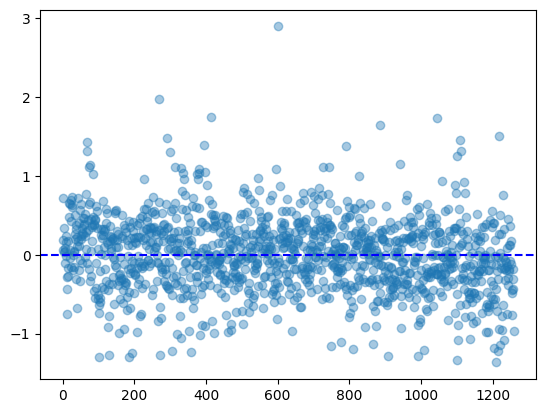

In [13]:
residuals = linear_model2.resid #get the residuals from our linear model

plt.plot(residuals,  'o', alpha=.4) #make a plot of the residuals
plt.axhline(y = 0, color = 'b', linestyle = '--') #add a straight line at y = 0

print('The Average of the residuals is:', residuals.mean()) #calculate the average of residuals

The results show that our regression residuals average is very very close to zero. Confirming the fourth hypothesis.

5. To check if our model is homoscedastic, we're going to use a hypothesis test called Breusch-Pagan Test. In this test, $H_0$ states that the variance of residuals is contant (the model is homocedastic). Otherwise, $H_1$ states that Homoscedasticity is not present (heteroscedasticity) 

$$ H_0: Var(u) = \sigma^2 .$$ 
$$ H_1: Var(u) \neq \sigma^2 $$

For this test, we're using the p-value at a 5% significance level. If p-value > 5% () then $H_0$ is **not** rejected. 

- To calculate this on python, we'll need to import the test from statsmodels using `from statsmodels.stats.api import het_breuschpagan`

In [14]:
from statsmodels.stats.api import het_breuschpagan

_,p_value,_,f_p_value = het_breuschpagan(residuals, X)
print('Breusch-Pagan Test P-Value:',p_value)
print('Breusch-Pagan Test F P-Value:',f_p_value)

Breusch-Pagan Test P-Value: 0.09927779036575077
Breusch-Pagan Test F P-Value: 0.099113812338534


The `het_breuschpagan()` function returns more then one result, but for us, only the p-values are important (that's why we use the '`_`' , to avoid saving these results). We can see above that for both tests the p-value is bigger than 5%, indicating the presence of Homoscedasticity, which means that $H_0$ is not rejected.

- Wow! Based on our diagnostic analysis we can affirm that our model have Best Linear Unbiased Estimators, following the Gauss-Markov Theorem.

## Conclusions
---

In this overview of linear regression, we learned that despite being a fundamental machine learning model, it is not simplistic at all, as it can be applied in various contexts to achieve powerful results!

In our specific project what conclusions can we make about the wage? 

> 1. The intercept term is 0.65, which represents the expected value of lwage when all the independent variables are zero. This can be interpreted as the minimum wage.

> 2. The coefficient for the variable "educ" is 0.07. This means that a one-unit increase in education level is associated with a 0.07 unit increase in the predicted value of lwage, holding other variables constant.

> 3. The coefficient for the variable "exper" is 0.01. This suggests that a one-unit increase in years of experience is associated with a 0.01 unit increase in the predicted value of lwage, holding other variables constant.

> 4. The coefficient for the variable "belavg" is -0.14. This indicates that being below average in looks is associated with a 0.14 unit decrease in the predicted value of lwage, holding other variables constant.

> 5. The coefficient for the variable "female" is -0.43. This suggests that being female is associated with a 0.43 unit **decrease** in the predicted value of lwage compared to males, holding other variables constant.

> 6. The coefficient for the variable "union" is 0.18. This means that being a union member is associated with a 0.18 unit increase in the predicted value of lwage, holding other variables constant.

> 7. The coefficient for the variable "black" is -0.12. This indicates that being black is associated with a 0.12 unit **decrease** in the predicted value of lwage compared to non-black individuals, holding other variables constant.

> 8. The coefficient for the variable "bigcity" is 0.18. This suggests that working in a big city is associated with a 0.18 unit increase in the predicted value of lwage, holding other variables constant.

We uncovered very strong insights based on such a basic model! The linear regression model can help us to uncover many relationships beetween variables and this can be immensely useful in a multitude of fields. For example:

- Economics: In economics, linear regression can be used to analyze the relationship between variables such as GDP and inflation rates, interest rates and housing prices, or consumer spending and income levels. These analyses help economists understand the impact of different factors on the economy and make predictions for policy planning.

- Marketing: Linear regression is used in marketing to analyze the relationship between advertising expenditure and sales. By fitting a regression model, marketers can estimate how much impact an increase in advertising spending will have on sales and optimize their marketing strategies accordingly.

- Finance: Linear regression is applied in finance for various purposes. For instance, it can be used to analyze the relationship between stock prices and factors such as interest rates, market indices, or company performance metrics. This analysis helps investors and financial analysts make informed decisions about portfolio allocation and risk management.

- Healthcare: Linear regression is used in healthcare research to examine the relationship between variables such as patient characteristics, treatment methods, and health outcomes. For example, it can be applied to assess the impact of lifestyle factors on disease risk or to predict patient outcomes based on various clinical indicators.

- Education: In education research, linear regression is used to explore the relationship between variables such as student performance and factors like class size, teacher qualifications, or educational interventions. This analysis helps in understanding the effectiveness of educational programs and identifying areas for improvement.

- Environmental Science: Linear regression is employed in environmental science to study the relationship between environmental variables. For example, it can be used to analyze the correlation between pollutant concentrations and meteorological factors, or to predict the impact of climate change on biodiversity.

- Sports Analytics: Linear regression is used extensively in sports analytics to analyze the performance of athletes or teams. It can be applied to evaluate the influence of various factors, such as player statistics, team composition, or game strategies, on the outcome of matches and to make predictions.


Some considerations about this model:

- Cross Sectional Analysis Model: The linear regression model is used for Cross Sectional Analysis. This type of analysis provides a snapshot of a population or sample at a given moment or point in time. However, it does not capture changes over time (Correlated Residuals) and thus, linear regression can't help directly with time-series problems.
- Linear regression is at it's best when we are tryng to figure out the relation between the varibles, but when it comes to make predictions for the future, there are more sophisticated models that can help.